Clustering: Hierarchical 
Dataset : hitters.csv 
 
Apply Data pre-processing (Label Encoding , Data 
Transformation….) techniques if necessary. 
Apply Hierarchical clustering algorithms (based on CRuns column) to 
find the group of players.

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset
data = pd.read_csv('Hitters.csv')

# Preview the dataset
data.head()


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [3]:
# Check for missing values
print(data.isnull().sum())
# Drop or fill missing values if necessary
data = data.dropna()


AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64


In [4]:
# Standardize the 'CRuns' column
scaler = StandardScaler()
data['CRuns_scaled'] = scaler.fit_transform(data[['CRuns']])


In [5]:
# Prepare data for clustering
X = data[['CRuns_scaled']]

# Perform hierarchical clustering
linked = linkage(X, method='ward')


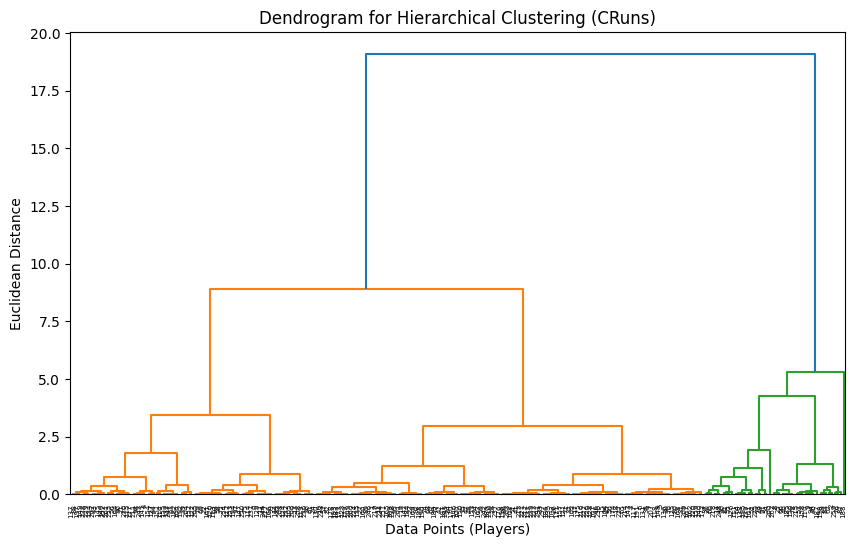

In [ ]:
# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title("Dendrogram for Hierarchical Clustering (CRuns)")
plt.xlabel("Data Points (Players)")
plt.ylabel("Euclidean Distance")
plt.show()


In [7]:
from scipy.cluster.hierarchy import fcluster

# Set the cutoff distance or desired number of clusters
clusters = fcluster(linked, t=3, criterion='maxclust')  # t=3 creates 3 clusters; adjust as needed
data['cluster'] = clusters

# Display the cluster assignment
print(data[['CRuns', 'cluster']])


     CRuns  cluster
1      321        3
2      224        2
3      828        1
4       48        2
5      501        3
..     ...      ...
317    379        3
318    897        1
319    217        2
320    470        3
321    775        1

[263 rows x 2 columns]


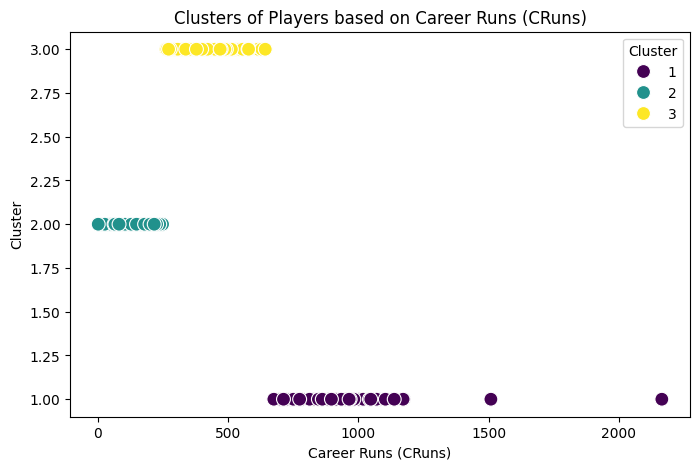

In [8]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='CRuns', y='cluster', hue='cluster', palette='viridis', s=100)
plt.title("Clusters of Players based on Career Runs (CRuns)")
plt.xlabel("Career Runs (CRuns)")
plt.ylabel("Cluster")
plt.legend(title="Cluster")
plt.show()
